In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
penguins = pd.read_csv('C:/Users/HP/Desktop/Classification_Regression_Methods/noisy_datasets/noisy_datasets/penguins.csv')

dataset2 = pd.read_csv('C:/Users/HP/Desktop/Classification_Regression_Methods/noisy_datasets/noisy_datasets/emissions_by_country.csv')
dataset3 = pd.read_csv('C:/Users/HP/Desktop/Classification_Regression_Methods/noisy_datasets/noisy_datasets/diamond.csv')



In [10]:
print(penguins.describe())

       calorie requirement  average sleep duration  bill_length_mm  \
count           344.000000              344.000000      337.000000   
mean           5270.002907               10.447674       45.494214   
std            1067.959116                2.265895       10.815787   
min            3504.000000                7.000000       32.100000   
25%            4403.000000                9.000000       39.500000   
50%            5106.500000               10.000000       45.100000   
75%            6212.750000               12.000000       49.000000   
max            7197.000000               14.000000      124.300000   

       bill_depth_mm  flipper_length_mm  body_mass_g         year  
count     333.000000         336.000000   339.000000   342.000000  
mean       18.018318         197.764881  4175.463127  2008.035088  
std         9.241384          27.764491   858.713267     0.816938  
min        13.100000          10.000000   882.000000  2007.000000  
25%        15.700000         

In [47]:
penguins.shape

(344, 10)

In [46]:
print(penguins.isnull().sum())

species                   11
island                    10
calorie requirement        0
average sleep duration     0
bill_length_mm             7
bill_depth_mm             11
flipper_length_mm          8
body_mass_g                5
gender                    17
year                       2
dtype: int64


In [62]:
penguins['gender'] = penguins['gender'].dropna()
print(penguins.isnull().sum())

species                   11
island                    10
calorie requirement        0
average sleep duration     0
bill_length_mm             7
bill_depth_mm             11
flipper_length_mm          8
body_mass_g                5
gender                    17
year                       2
dtype: int64


In [63]:
penguins.shape

(344, 10)

In [14]:
numeric_cols = penguins.select_dtypes(include=[np.number]).columns
categorical_cols = penguins.select_dtypes(exclude=[np.number]).columns


In [19]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        if not np.isnan(row1[i]) and not np.isnan(row2[i]):
            distance += (row1[i] - row2[i]) ** 2
    return np.sqrt(distance)

def knn_impute_numeric(data, k=5):
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if np.isnan(data[i, j]):
                distances = []
                for r in range(data.shape[0]):
                    if r != i and not np.isnan(data[r, j]):
                        distances.append((euclidean_distance(data[i], data[r]), data[r, j]))

                distances.sort(key=lambda x: x[0])
                neighbors = [dist[1] for dist in distances[:k]]
        
                data[i, j] = np.mean(neighbors)
    
    return data
    
penguin_numeric_values = penguins[numeric_cols].values  
penguin_numeric_imputed = knn_impute_numeric(penguin_numeric_values, k=5)

penguins[numeric_cols] = pd.DataFrame(penguin_numeric_imputed, columns=numeric_cols)

for col in categorical_cols:
    penguins[col] = penguins[col].fillna(penguins[col].mode()[0])
print(penguins.isnull().sum())




species                   0
island                    0
calorie requirement       0
average sleep duration    0
bill_length_mm            0
bill_depth_mm             0
flipper_length_mm         0
body_mass_g               0
gender                    0
year                      0
dtype: int64


In [24]:
penguins['species'] = penguins['species'].str.capitalize()


In [26]:
penguins_clean = penguins[(penguins['flipper_length_mm'] >= 180) & (penguins['flipper_length_mm'] <= 210)]
flipper_mean = penguins['flipper_length_mm'].mean()
penguins.loc[(penguins['flipper_length_mm'] < 180) | (penguins['flipper_length_mm'] > 210), 'flipper_length_mm'] = flipper_mean


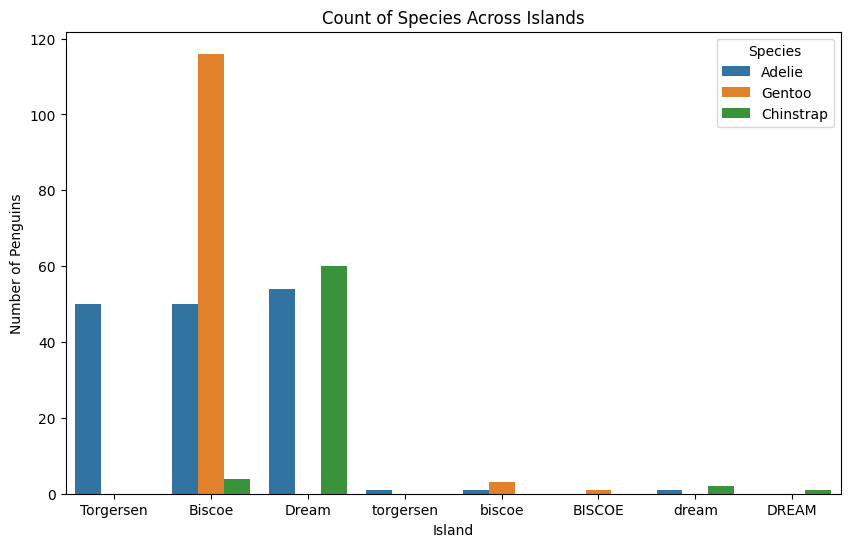

In [29]:
# Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=penguins, x='island', hue='species')
plt.title('Count of Species Across Islands')
plt.ylabel('Number of Penguins')
plt.xlabel('Island')
plt.legend(title='Species')
plt.show()


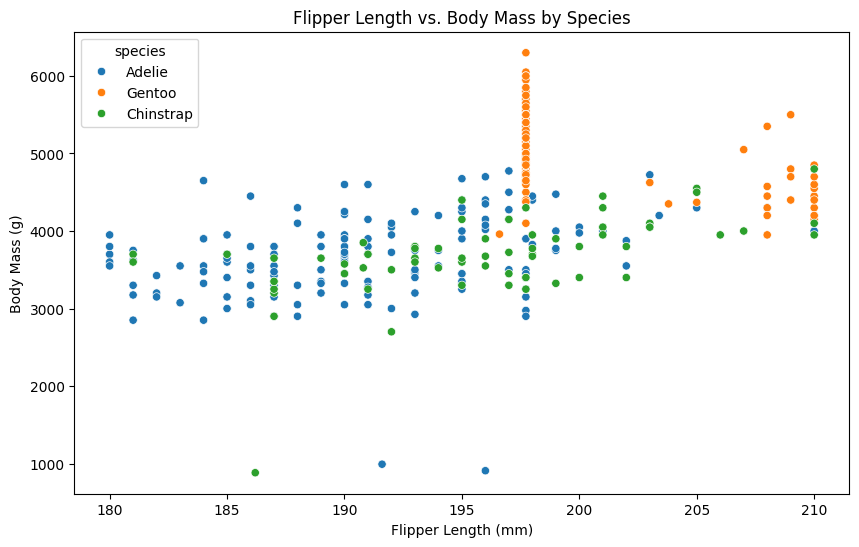

In [31]:
#Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.title('Flipper Length vs. Body Mass by Species')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()


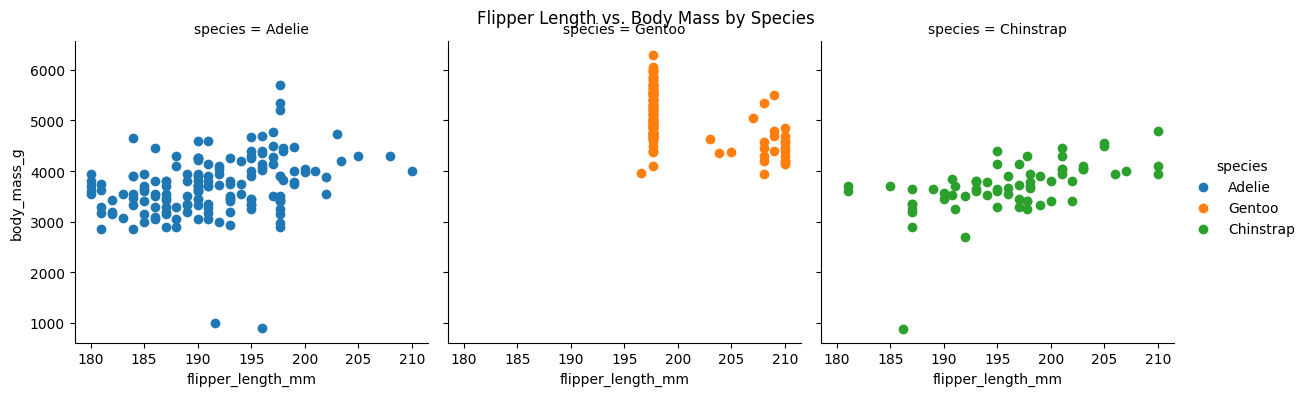

In [33]:
#Facet Grid
g = sns.FacetGrid(penguins, col='species', hue='species', height=4)
g.map(plt.scatter, 'flipper_length_mm', 'body_mass_g')
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Flipper Length vs. Body Mass by Species')
plt.show()


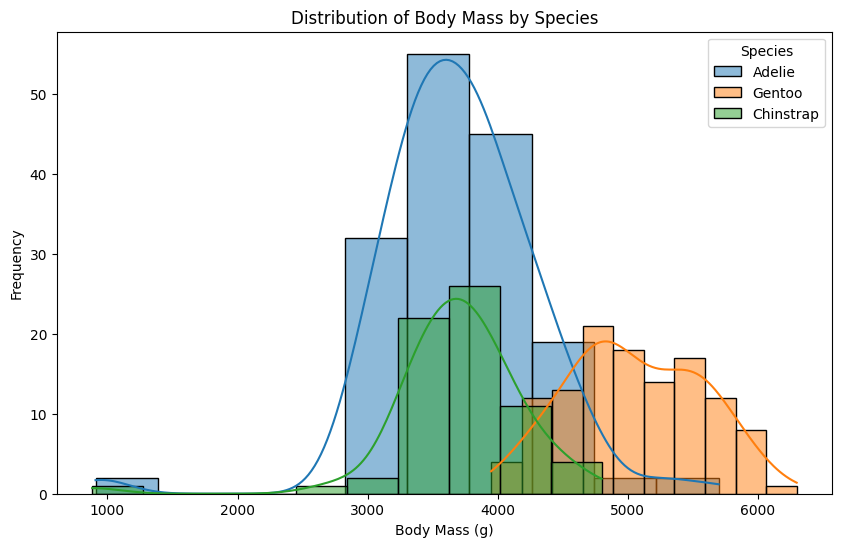

In [34]:
#Histogram
plt.figure(figsize=(10, 6))
for species in penguins['species'].unique():
    subset = penguins[penguins['species'] == species]
    sns.histplot(subset['body_mass_g'], kde=True, label=species, bins=10)
plt.title('Distribution of Body Mass by Species')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.legend(title='Species')
plt.show()


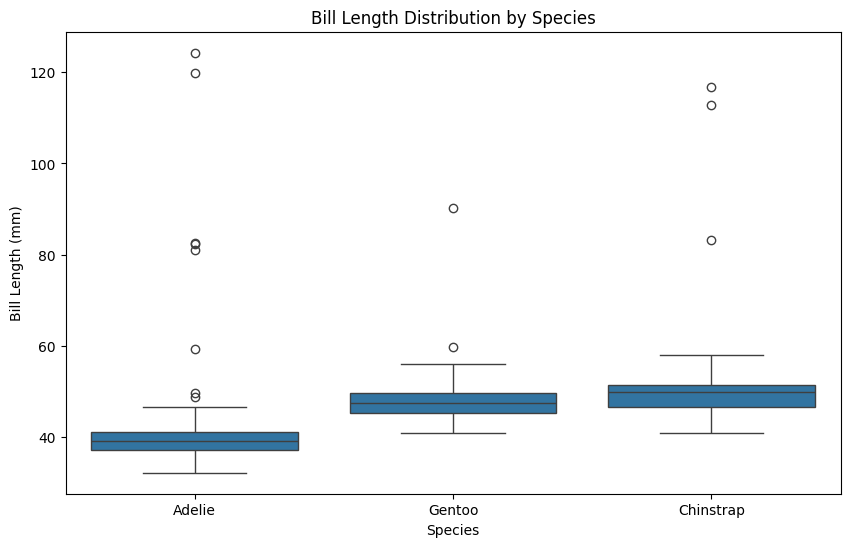

In [35]:
#BoxPlot
plt.figure(figsize=(10, 6))
sns.boxplot(data=penguins, x='species', y='bill_length_mm')
plt.title('Bill Length Distribution by Species')
plt.ylabel('Bill Length (mm)')
plt.xlabel('Species')
plt.show()


In [8]:
# Compute the correlation matrix for numeric columns
correlation_matrix = penguins[numeric_cols].corr()

# Print the correlation with the target variable 'is_male'
print(correlation_matrix['is_male'])

# Identify features with low correlation (< 0.1 or another threshold)
low_correlation_features = correlation_matrix[correlation_matrix['is_male'].abs() < 0.1].index.tolist()

# Check if 'is_male' is in the list before removing
if 'is_male' in low_correlation_features:
    low_correlation_features.remove('is_male')  # We don't want to remove the target variable

print("Uncorrelated Features:", low_correlation_features)

# Drop uncorrelated features from the dataset
penguins_reduced = penguins.drop(columns=low_correlation_features)

# Output the reduced dataset to confirm
print(penguins_reduced.head())


calorie requirement      -0.001694
average sleep duration    0.066130
bill_length_mm            0.134816
bill_depth_mm             0.167459
flipper_length_mm         0.174676
body_mass_g               0.436628
year                      0.003127
is_male                   1.000000
Name: is_male, dtype: float64
Uncorrelated Features: ['calorie requirement', 'average sleep duration', 'year']
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g  gender  is_male  
0       3750.0    male      1.0  
1       3800.0  female      0.0  
2       3250.0  female      0.0  
3        992.0     NaN      

In [17]:
print(dataset3)

           Country ISO 3166-1 alpha-3    Year         Total  Temperature  \
0      Afghanistan                AFG  1750.0      0.000000           70   
1      Afghanistan                AFG  1751.0      0.000000           66   
2      Afghanistan                AFG  1752.0      0.000000           72   
3      Afghanistan                AFG  1753.0      0.000000           44   
4      Afghanistan                AFG  1754.0      0.000000           21   
...            ...                ...     ...           ...          ...   
63099       Global                WLD  2017.0  36096.739276           22   
63100       Global                WLD  2018.0  36826.506600           44   
63101       Global                WLD  2019.0  37082.558969           78   
63102       Global                WLD  2020.0  35264.085734           34   
63103       Global                WLD  2021.0  37123.850352           36   

       GDP Per Capita (USD)          Coal           Oil          Gas  \
0              

In [18]:
dataset3.shape

(63104, 13)

In [20]:
print(dataset3.isnull().sum())

Country                  2017
ISO 3166-1 alpha-3       3621
Year                      797
Total                     723
Temperature                 0
GDP Per Capita (USD)        0
Coal                    41307
Oil                     41330
Gas                     41387
Cement                  42616
Flaring                 41766
Other                   60419
Per Capita              43712
dtype: int64


In [23]:
dataset3_cleaned = dataset3.dropna()
print(dataset3_cleaned.isnull().sum())


Country                 0
ISO 3166-1 alpha-3      0
Year                    0
Total                   0
Temperature             0
GDP Per Capita (USD)    0
Coal                    0
Oil                     0
Gas                     0
Cement                  0
Flaring                 0
Other                   0
Per Capita              0
dtype: int64


In [31]:
dataset3['Coal'].fillna(dataset3['Coal'].mean())
dataset3['Year'].fillna(dataset3['Year'].mean())
dataset3['Temperature'].fillna(dataset3['Temperature'].mean())
dataset3['Oil'].fillna(dataset3['Oil'].mean())

# 3 Handling categorical missing values by filling with mode
dataset3['Gas'].fillna(dataset3['Gas'].mode()[0])

# Data transformation: Adding a new column for BMI (Body Mass Index) estimation for penguins

# 4  Handle mismatched string formats
dataset3['Country'] = dataset3['Country'].str.capitalize()

In [35]:
dataset3['Temperature'] = dataset3['Temperature'].astype(float)
dataset3.loc[(dataset3['Temperature'] < 60) | (dataset3['Temperature'] > 70), 'Temperature'] = temperature_mean


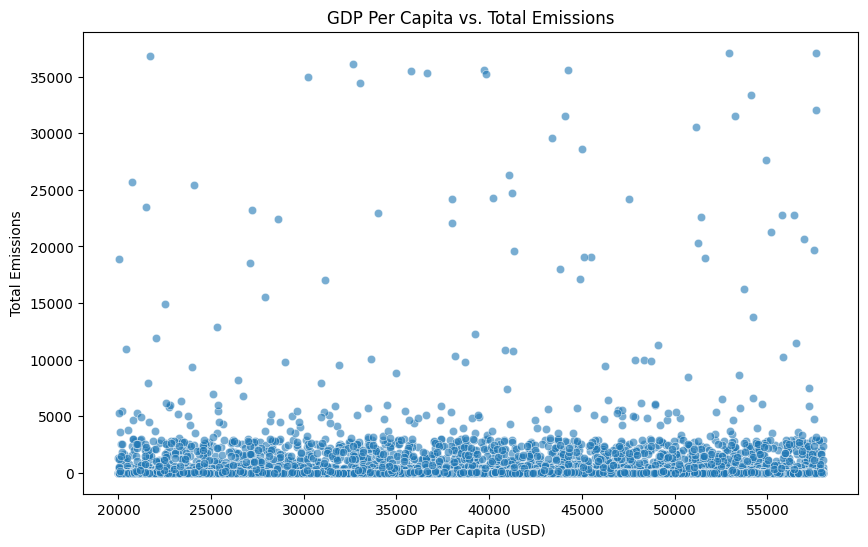

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP Per Capita (USD)', y='Total', data=dataset3, alpha=0.6)
plt.title('GDP Per Capita vs. Total Emissions')
plt.xlabel('GDP Per Capita (USD)')
plt.ylabel('Total Emissions')
plt.show()


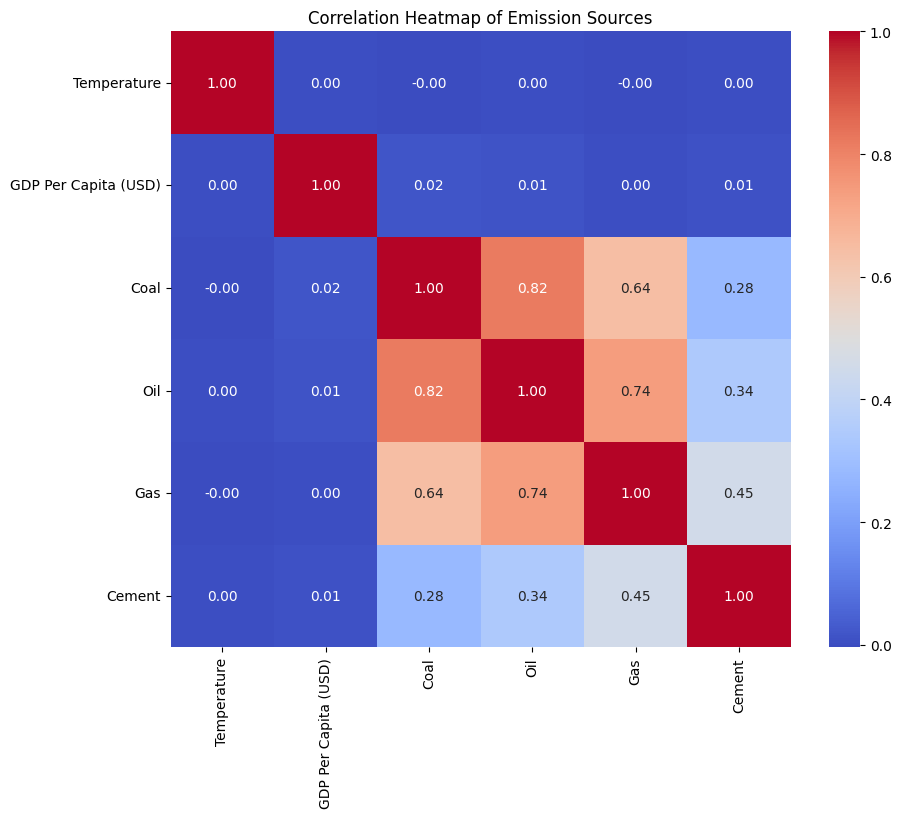

In [41]:
plt.figure(figsize=(10, 8))
correlation_matrix = dataset3.iloc[:, 4:10].corr()  # Adjust index range for features
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Emission Sources')
plt.show()


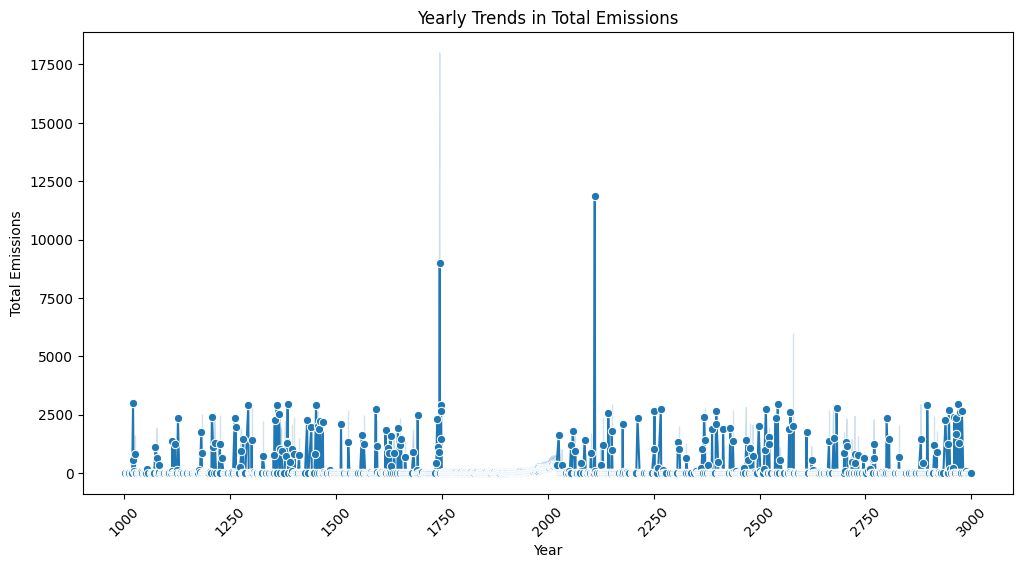

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Total', data=dataset3, marker='o')
plt.title('Yearly Trends in Total Emissions')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45)
plt.show()


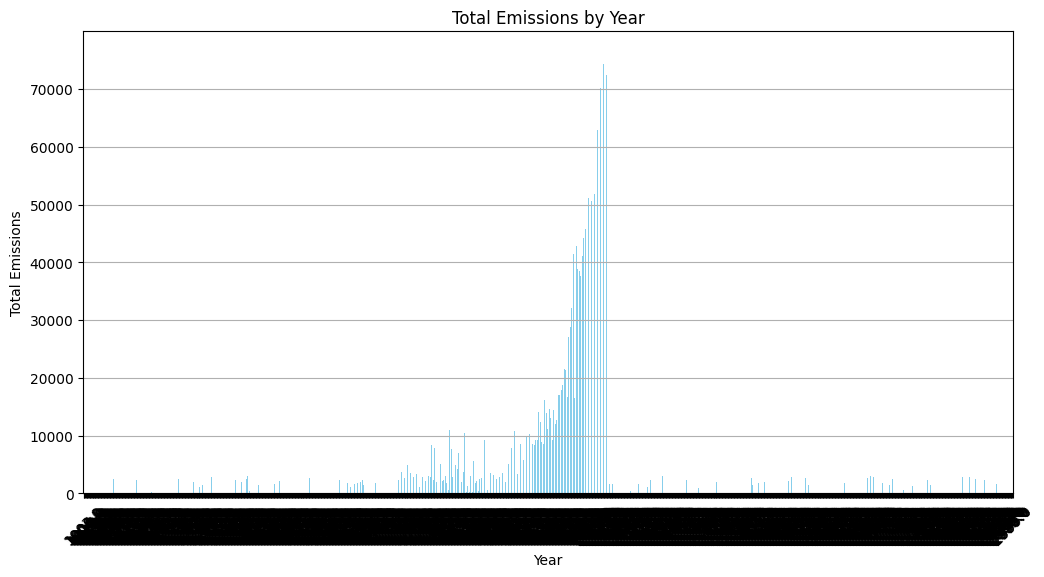

In [48]:
import matplotlib.pyplot as plt

# Group the data by year and sum the total emissions
total_emissions_by_year = dataset3.groupby('Year')['Total'].sum()

plt.figure(figsize=(12, 6))
total_emissions_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


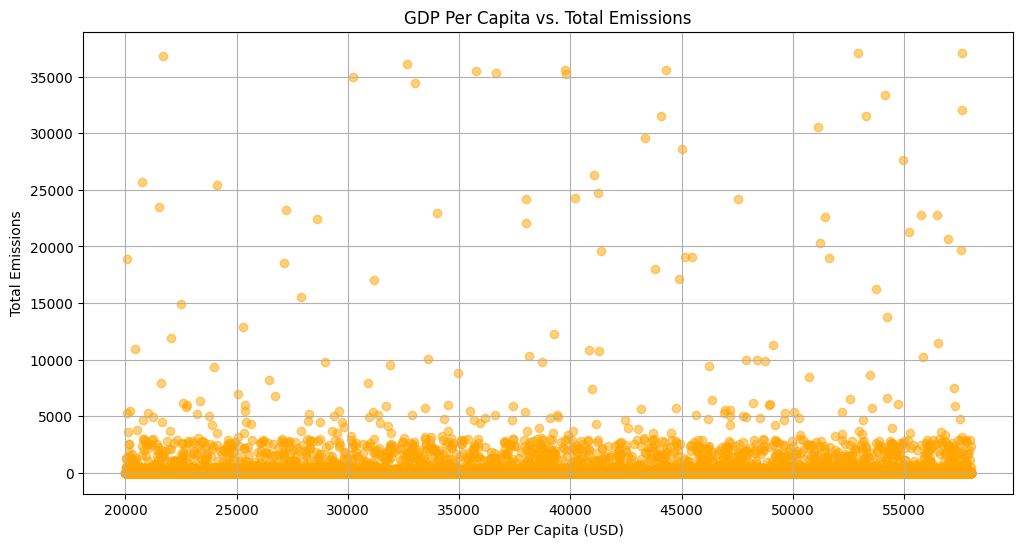

In [49]:
plt.figure(figsize=(12, 6))
plt.scatter(dataset3['GDP Per Capita (USD)'], dataset3['Total'], alpha=0.5, color='orange')
plt.title('GDP Per Capita vs. Total Emissions')
plt.xlabel('GDP Per Capita (USD)')
plt.ylabel('Total Emissions')
plt.grid()
plt.show()


In [50]:
emission_threshold = dataset3['Total'].median()  # You can adjust this threshold as needed
dataset3['is_high_emission'] = (dataset3['Total'] > emission_threshold).astype(int)

# Select numeric columns for correlation analysis
numeric_cols = dataset3.select_dtypes(include=[np.number]).columns.tolist()

# Compute the correlation matrix for numeric columns
correlation_matrix = dataset3[numeric_cols].corr()

# Print the correlation with the target variable 'is_high_emission'
print(correlation_matrix['is_high_emission'])

# Identify features with low correlation (< 0.1 or another threshold)
low_correlation_features = correlation_matrix[correlation_matrix['is_high_emission'].abs() < 0.1].index.tolist()

# Check if 'is_high_emission' is in the list before removing
if 'is_high_emission' in low_correlation_features:
    low_correlation_features.remove('is_high_emission')  # We don't want to remove the target variable

print("Uncorrelated Features:", low_correlation_features)

# Drop uncorrelated features from the dataset
dataset3_reduced = dataset3.drop(columns=low_correlation_features)

# Output the reduced dataset to confirm
print(dataset3_reduced.head())

Year                    0.425868
Total                   0.118505
Temperature            -0.004509
GDP Per Capita (USD)   -0.002923
Coal                   -0.291183
Oil                    -0.430860
Gas                    -0.576470
Cement                 -0.190307
Flaring                -0.574213
Other                  -0.649238
Per Capita             -0.351549
is_high_emission        1.000000
Name: is_high_emission, dtype: float64
Uncorrelated Features: ['Temperature', 'GDP Per Capita (USD)']
       Country ISO 3166-1 alpha-3    Year  Total  Coal  Oil  Gas  Cement  \
0  Afghanistan                AFG  1750.0    0.0   NaN  NaN  NaN     NaN   
1  Afghanistan                AFG  1751.0    0.0   NaN  NaN  NaN     NaN   
2  Afghanistan                AFG  1752.0    0.0   NaN  NaN  NaN     NaN   
3  Afghanistan                AFG  1753.0    0.0   NaN  NaN  NaN     NaN   
4  Afghanistan                AFG  1754.0    0.0   NaN  NaN  NaN     NaN   

   Flaring  Other  Per Capita  is_high_emissi